In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

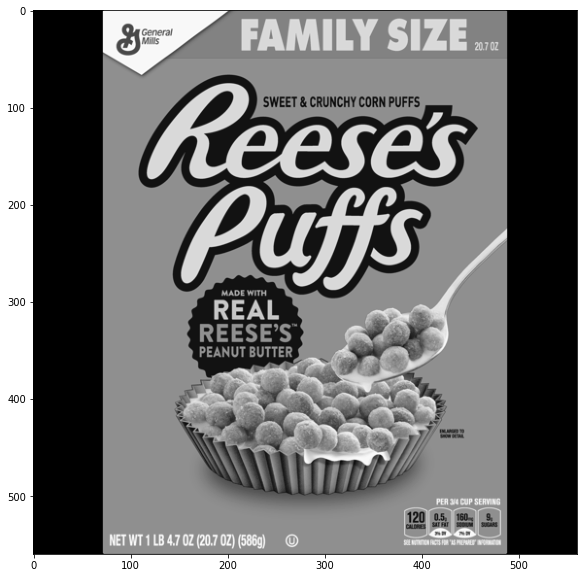

In [4]:
reeses = cv.imread('reeses_puffs.png', 0)
display(reeses)

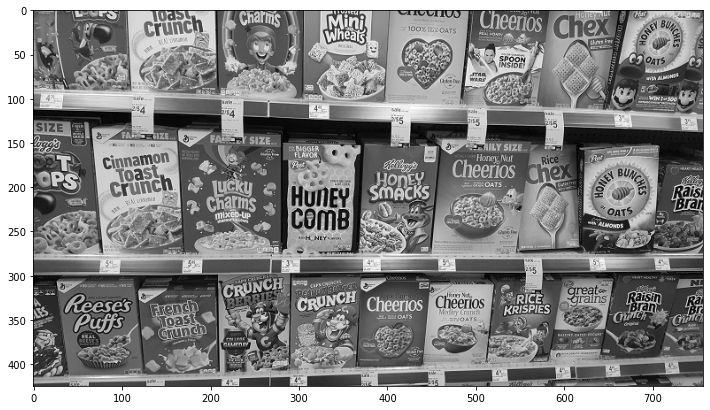

In [5]:
cereals = cv.imread('many_cereals.jpg', 0)
display(cereals)

In [6]:
sift = cv.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for match1,match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

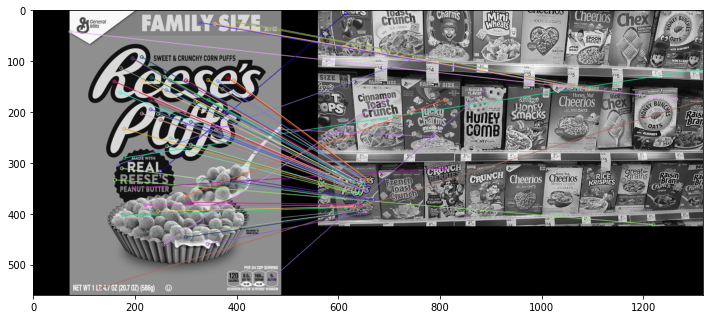

In [7]:
display(sift_matches)